## Logistic Regression

[[-4.10799374]
 [ 1.54354223]]


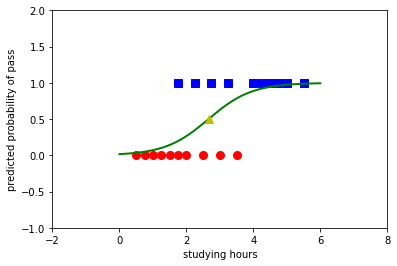

In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
from regression.LogisticSigmoidRegression import LogisticSigmoidRegression

np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
            2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)

LSR = LogisticSigmoidRegression(X, y)
w = LSR.fit(w_init, eta)
print(w[-1])

X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = LSR.sigmoid(w0 + w1*xx)

plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')

plt.show()

## Softmax Regression 1D

In [4]:
from regression.SoftMaxRegression import SoftMaxRegression

N = 2
d = 2
C = 3

X = np.random.rand(d, N)
y = np.random.randint(0, 3, (N,))

W_init = np.random.randn(d, C)
eta = .05
d = X.shape[0]
W_init = np.random.randn(d, C)

SR = SoftMaxRegression(X, y)
W = SR.fit(W_init, eta)
print(W[-1])

[[-1.01612991 -1.07067806  3.36236357]
 [-1.51067971 -1.35240459  5.26129952]]


## Softmax Regression MD

In [ ]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
eta = .05

# each column is a datapoint
X = np.concatenate((X0, X1, X2), axis = 0).T
# extended data
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
C = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

W_init = np.random.randn(X.shape[0], C)

SR = SoftMaxRegression(X, original_label)
W = SR.fit(W_init, eta)
print(W[-1])